# Exploratory Data Analysis of Laptop Dataset
**Author: Durvank Gade**

The Laptop dataset is an uncleaned dataset available at  https://www.kaggle.com/code/sreevaatsavbavana/laptop-price-prediction-and-eda/input . This dataset contains names, user ratings, prices(In Indian Rupees) and specifications of laptops available on Flipkart. This dataset is a **CSV(Comma Separated Values)** file. To read this file, I am going to use read_csv() function from pandas library. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Uncleaned dataset

filepath="Laptop_data_initial.csv" #Filepath of the Uncleaned dataset
df=pd.read_csv(filepath)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         984 non-null    int64  
 1   link                               984 non-null    object 
 2   name                               984 non-null    object 
 3   user rating                        690 non-null    float64
 4   Price                              984 non-null    object 
 5   Sales Package                      984 non-null    object 
 6   Model Number                       984 non-null    object 
 7   Part Number                        984 non-null    object 
 8   Model Name                         709 non-null    object 
 9   Series                             787 non-null    object 
 10  Color                              984 non-null    object 
 11  Type                               984 non-null    object 

In [3]:
pd.options.display.max_columns=98
df.head(3)

,Unnamed: 0,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,Color,Type,Suitable For,Power Supply,Battery Cell,MS Office Provided,Dedicated Graphic Memory Type,Dedicated Graphic Memory Capacity,Processor Brand,Processor Name,Processor Generation,SSD,SSD Capacity,RAM,RAM Type,Processor Variant,Clock Speed,Expandable Memory,Cache,Graphic Processor,Number of Cores,OS Architecture,Operating System,Supported Operating System,Mic In,USB Port,HDMI Port,Touchscreen,Screen Size,Screen Resolution,Screen Type,Speakers,Internal Mic,Sound Properties,Wireless LAN,Bluetooth,Dimensions,Weight,Disk Drive,Finger Print Sensor,Keyboard,Backlit Keyboard,Additional Features,Warranty Summary,Warranty Service Type,Covered in Warranty,Not Covered in Warranty,Domestic Warranty,Ethernet,Web Camera,Pointer Device,Included Software,Battery Backup,Chipset,Memory Slots,RAM Frequency,RJ45,Sound Chip,Brightness,Laptop Bag,Other Accessories,International Warranty,Wireless WAN,Recovery Options,RPM,Hardware Interface,Face Recognition,System Architecture,Refresh Rate,Antivirus,Multi Card Slot,Lock Port,NFC Support,HDD Capacity,Stylus Included,TGP,VGA Port,Color Gamut,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
0,0,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,5.0,"?2,34,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G733ZW-LL139WS,90NR08G2-M007S0,G733ZW-LL139WS,ROG Strix SCAR 17,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,GDDR6,8 GB,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,64,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,43.94 cm (17.3 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,395 x 282 x 28.3 mm,2.90 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 15 Core i9 12th Gen - (32 ...,NaN,"?2,29,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G533ZW-LN136WS,90NR0872-M007L0,G533ZW-LN136WS,ROG Strix SCAR 15,Off Black,Gaming Laptop,Gaming,280 W AC Adapter,4 cell,Yes,GDDR6,8 GB,Intel,Core i9,12th Gen,Yes,1 TB,32 GB,DDR5,12900H,2.5 GHz upto max turbo frequency at 5.0 Ghz,64,24,NVIDIA GeForce RTX 3070 Ti,14.0,64 bit,Windows 11 Home,Windows 11 Home,Yes,"1 x Thunderbolt 4 support DisplayPort, 1 x USB...",1 x HDMI 2.1,No,39.62 cm (15.6 inch),2560 x 1440 Pixel,"WQHD, IPS-level, 300nits, Contras 1000:1, Anti...",Four built-in speakers,Built-in array microphone,"AI noise-canceling technology, Dolby Atmos, Hi...",Wi-Fi 6E(802.11ax),v5.2,354 x 259 x 27.2 mm,2.30 kg,Not Available,No,Backlit Chiclet Keyboard Per-Key RGB,Yes,90 WHrs Li-ion Battery,1 Year Onsite Warranty,Onsite,Manufacturing Defects,Accidental Damage,1 Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,HP Victus Ryzen 7 Octa Core 5800H - (16 GB/512...,NaN,"?1,04,091","Laptop, battery, adapter, cables and user manuals",16-e0351AX,552X1PA#ACJ,16-e0351AX,Victus,Mica Silver,Gaming Laptop,Gaming,NaN,4 cell,Yes,GDDR6,4 GB,AMD,Ryzen 7 Octa Core,NaN,Yes,512 GB,16 GB,DDR4,5800H,3.2 GHz upto max turbo frequency at 4.4 GHz,NaN,16MB,NVIDIA GeForce RTX 3050,8.0,64 bit,Windows 11 Home,Windows 11 Home 64 Plus Single

There are 984 rows and 98 columns in the original dataset. To remove unwanted rows, a new DataFrame that contains only required columns from the original datasets can be created. The rows containing null values were removed using using **dropna()** function.

In [4]:
df1=df[["name","Model Number","user rating","Price","Processor Brand","Processor Name","SSD","RAM","Processor Variant"]].copy()
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1

,index,name,Model Number,user rating,Price,Processor Brand,Processor Name,SSD,RAM,Processor Variant
0,0,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,G733ZW-LL139WS,5.0,"?2,34,990",Intel,Core i9,Yes,32 GB,12900H
1,8,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/1...,FX506LH-HN310W,4.7,"?64,990",Intel,Core i5,Yes,8 GB,i5-10300H
2,9,DELL Inspiron Pentium Silver - (8 GB/256 GB SS...,Inspiron 3521,4.0,"?32,999",Intel,Pentium Silver,Yes,8 GB,N5030
3,10,DELL Inspiron Athlon Dual Core 3050U - (8 GB/2...,Inspiron 3525,4.2,"?30,990",AMD,Athlon Dual Core,Yes,8 GB,3050U
4,18,realme Book Prime Core i5 11th Gen - (16 GB/51...,CloudPro002,4.3,"?64,990",Intel,Core i5,Yes,16 GB,11320H
...,...,...,...,...,...,...,...,...,...,...
631,976,ASUS VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,X412FA-EK296T,4.5,"?53,690",Intel,Core i5,Yes,8 GB,8265U
632,977,Lenovo Yoga Core i7 10th Gen - (16 GB/1 TB SSD...,Yoga S940-14IIL,2.5,"?1,42,990",Intel,Core i7,Yes,16 GB,1065G7
633,979,Nokia PureBook X14 Core i5 10th Gen - (8 GB/51...,NKi510UL85S,4.4,"?53,990",Intel,Core i5,Yes,8 GB,10210U
634,982,HP 14a Celeron Dual Core - (4 GB/64 GB EMMC St...,14a- na0002TU,3.6,"?26,990",Intel,Celeron Dual Core,No,4 GB,N4020


The “user rating” column contains the ratings given by the customers for each laptop, ranging from 0 to 5. To ensure that there are no invalid values in this column, we can use a for loop to iterate over the ratings and check if any of them are greater than 5. After running the code, we find that there are no such values, so we do not need to perform any further cleaning on this column.
The “price” column shows the price of each laptop in Indian Rupees (INR). However, some of the values have ‘?’ and ‘,’ symbols, which make them difficult to process as numerical data. To remove these symbols and convert the values into integers, we can use the following code:


In [5]:
for i in df1["user rating"]:
    if i>5:
        print("Invalid value")
    else:
        continue
l=[]
price_split=[]
processed_inr=''
Processed_Price=pd.DataFrame()
for i in range(0, len(df1['Price'])):
    price_split=df1["Price"][i].split(sep=',')
    price_split[0]=price_split[0].split(sep='?')[1]
    for j in price_split:
        processed_inr+=j
    df1.loc[i,"Price"]=int(processed_inr)
    processed_inr=''
df1

,index,name,Model Number,user rating,Price,Processor Brand,Processor Name,SSD,RAM,Processor Variant
0,0,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,G733ZW-LL139WS,5.0,234990,Intel,Core i9,Yes,32 GB,12900H
1,8,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/1...,FX506LH-HN310W,4.7,64990,Intel,Core i5,Yes,8 GB,i5-10300H
2,9,DELL Inspiron Pentium Silver - (8 GB/256 GB SS...,Inspiron 3521,4.0,32999,Intel,Pentium Silver,Yes,8 GB,N5030
3,10,DELL Inspiron Athlon Dual Core 3050U - (8 GB/2...,Inspiron 3525,4.2,30990,AMD,Athlon Dual Core,Yes,8 GB,3050U
4,18,realme Book Prime Core i5 11th Gen - (16 GB/51...,CloudPro002,4.3,64990,Intel,Core i5,Yes,16 GB,11320H
...,...,...,...,...,...,...,...,...,...,...
631,976,ASUS VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,X412FA-EK296T,4.5,53690,Intel,Core i5,Yes,8 GB,8265U
632,977,Lenovo Yoga Core i7 10th Gen - (16 GB/1 TB SSD...,Yoga S940-14IIL,2.5,142990,Intel,Core i7,Yes,16 GB,1065G7
633,979,Nokia PureBook X14 Core i5 10th Gen - (8 GB/51...,NKi510UL85S,4.4,53990,Intel,Core i5,Yes,8 GB,10210U
634,982,HP 14a Celeron Dual Core - (4 GB/64 GB EMMC St...,14a- na0002TU,3.6,26990,Intel,Celeron Dual Core,No,4 GB,N4020


The cleaned data provides many useful insights, such as price trends, user preferences, feature correlations, and market opportunities. For example, we can:
Examine the most common specifications of laptops and compare them with the average prices and ratings.
Identify potential gaps or opportunities in the market based on the demand and supply of different laptop features.
Investigate whether there is a relationship between the processor brand and the user ratings of laptops.
This can be achieved through graphical visualisation of data using Python libraries like matplotlib, seaborn, etSome of the plots possible are:c.  


**1. Histogram of distribution of User Ratings:**


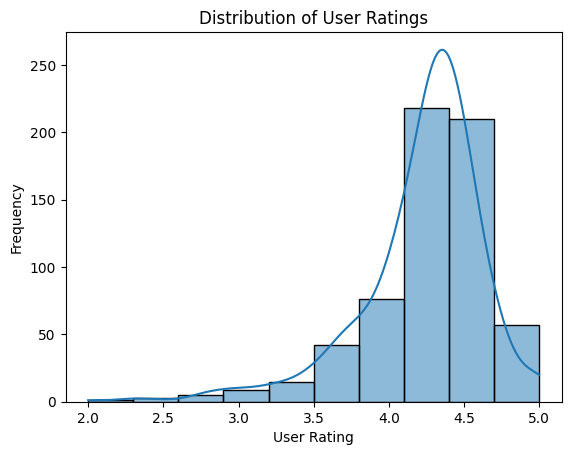

In [6]:
sns.histplot(df1['user rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

**2. Scatter Plot of RAM vs Price:**


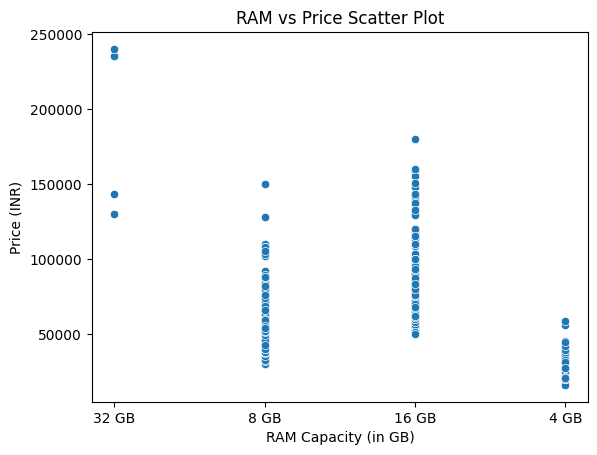

In [7]:
sns.scatterplot(x='RAM', y='Price', data=df1)
plt.title('RAM vs Price Scatter Plot')
plt.xlabel('RAM Capacity (in GB)')
plt.ylabel('Price (INR)')
plt.show()

From the above scatterplot we can infer that most of the 4GB RAM laptops are below 50,000 INR price range and all the 32 GB RAM laptops are above 1,00,000 INR price range.

**3.User Ratings vs Processor Brands**

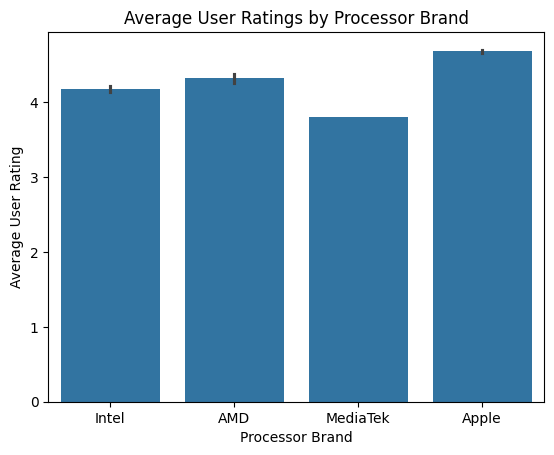

In [9]:
sns.barplot(x='Processor Brand', y='user rating', data=df1)
plt.title('Average User Ratings by Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Average User Rating')
plt.show()